<a href="https://colab.research.google.com/github/nitinog10/Crops-impurity-ml/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os

dataset_name = 'mdwaquarazam/agricultural-crops-image-classification'
download_path = kagglehub.dataset_download(dataset_name, force_download=True)

print(f"Dataset '{dataset_name}' downloaded to: {download_path}")

Using Colab cache for faster access to the 'agricultural-crops-image-classification' dataset.
Dataset 'mdwaquarazam/agricultural-crops-image-classification' downloaded to: /kaggle/input/agricultural-crops-image-classification


# Task
Explore the structure of the downloaded agricultural crops dataset at "/kaggle/input/agricultural-crops-image-classification" to understand its organization for impurity verification and subsequent image classification model training.

## Explore Dataset and Image Structure

### Subtask:
Inspect the downloaded dataset to understand its folder structure and locate the image files.


**Reasoning**:
To inspect the dataset's folder structure, I will list the contents of the `download_path` and then recursively list contents of subdirectories to find image files and print sample paths.



In [2]:
import os

print(f"Contents of {download_path}:")
for item in os.listdir(download_path):
    item_path = os.path.join(download_path, item)
    print(f"  - {item}")
    if os.path.isdir(item_path):
        # Check subdirectories for images
        for sub_item in os.listdir(item_path):
            sub_item_path = os.path.join(item_path, sub_item)
            print(f"    - {sub_item}")
            if os.path.isdir(sub_item_path):
                # Go one level deeper, assuming images are likely here or directly in the previous level
                for image_file in os.listdir(sub_item_path):
                    if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                        print(f"      Sample image found: {os.path.join(sub_item_path, image_file)}")
                        break # Print one sample per deep directory and move on
                else:
                    # If no image found in the deepest level, check the current sub_item_path
                    for image_file in os.listdir(sub_item_path):
                         if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                            print(f"      Sample image found: {os.path.join(sub_item_path, image_file)}")
                            break



Contents of /kaggle/input/agricultural-crops-image-classification:
  - Agricultural-crops
    - tomato
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (16).jpeg
    - chilli
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/chilli/image23.jpeg
    - clove
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/clove/image23.jpeg
    - pineapple
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/pineapple/image (5).jpg
    - vigna-radiati(Mung)
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/vigna-radiati(Mung)/image (4).jpeg
    - Olive-tree
      Sample image found: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Olive-tree/image (4).jpeg
    - coconut
      Sample image found: /kaggle/input/agricultural-crops

## Load and Visualize Sample Images

### Subtask:
Load and display a few sample images from the dataset to visually inspect the data and identify any immediate signs of impurities or inconsistencies.


**Reasoning**:
To visually inspect the data, I need to define the base directory of the crop images, get the list of class names, and then sample a few images from some of these classes. This will allow for a visual check for impurities or inconsistencies as per the subtask's instructions.



Selected 10 classes for sampling: ['clove', 'mustard-oil', 'gram', 'Cucumber', 'vigna-radiati(Mung)', 'coconut', 'tomato', 'papaya', 'Lemon', 'tea']


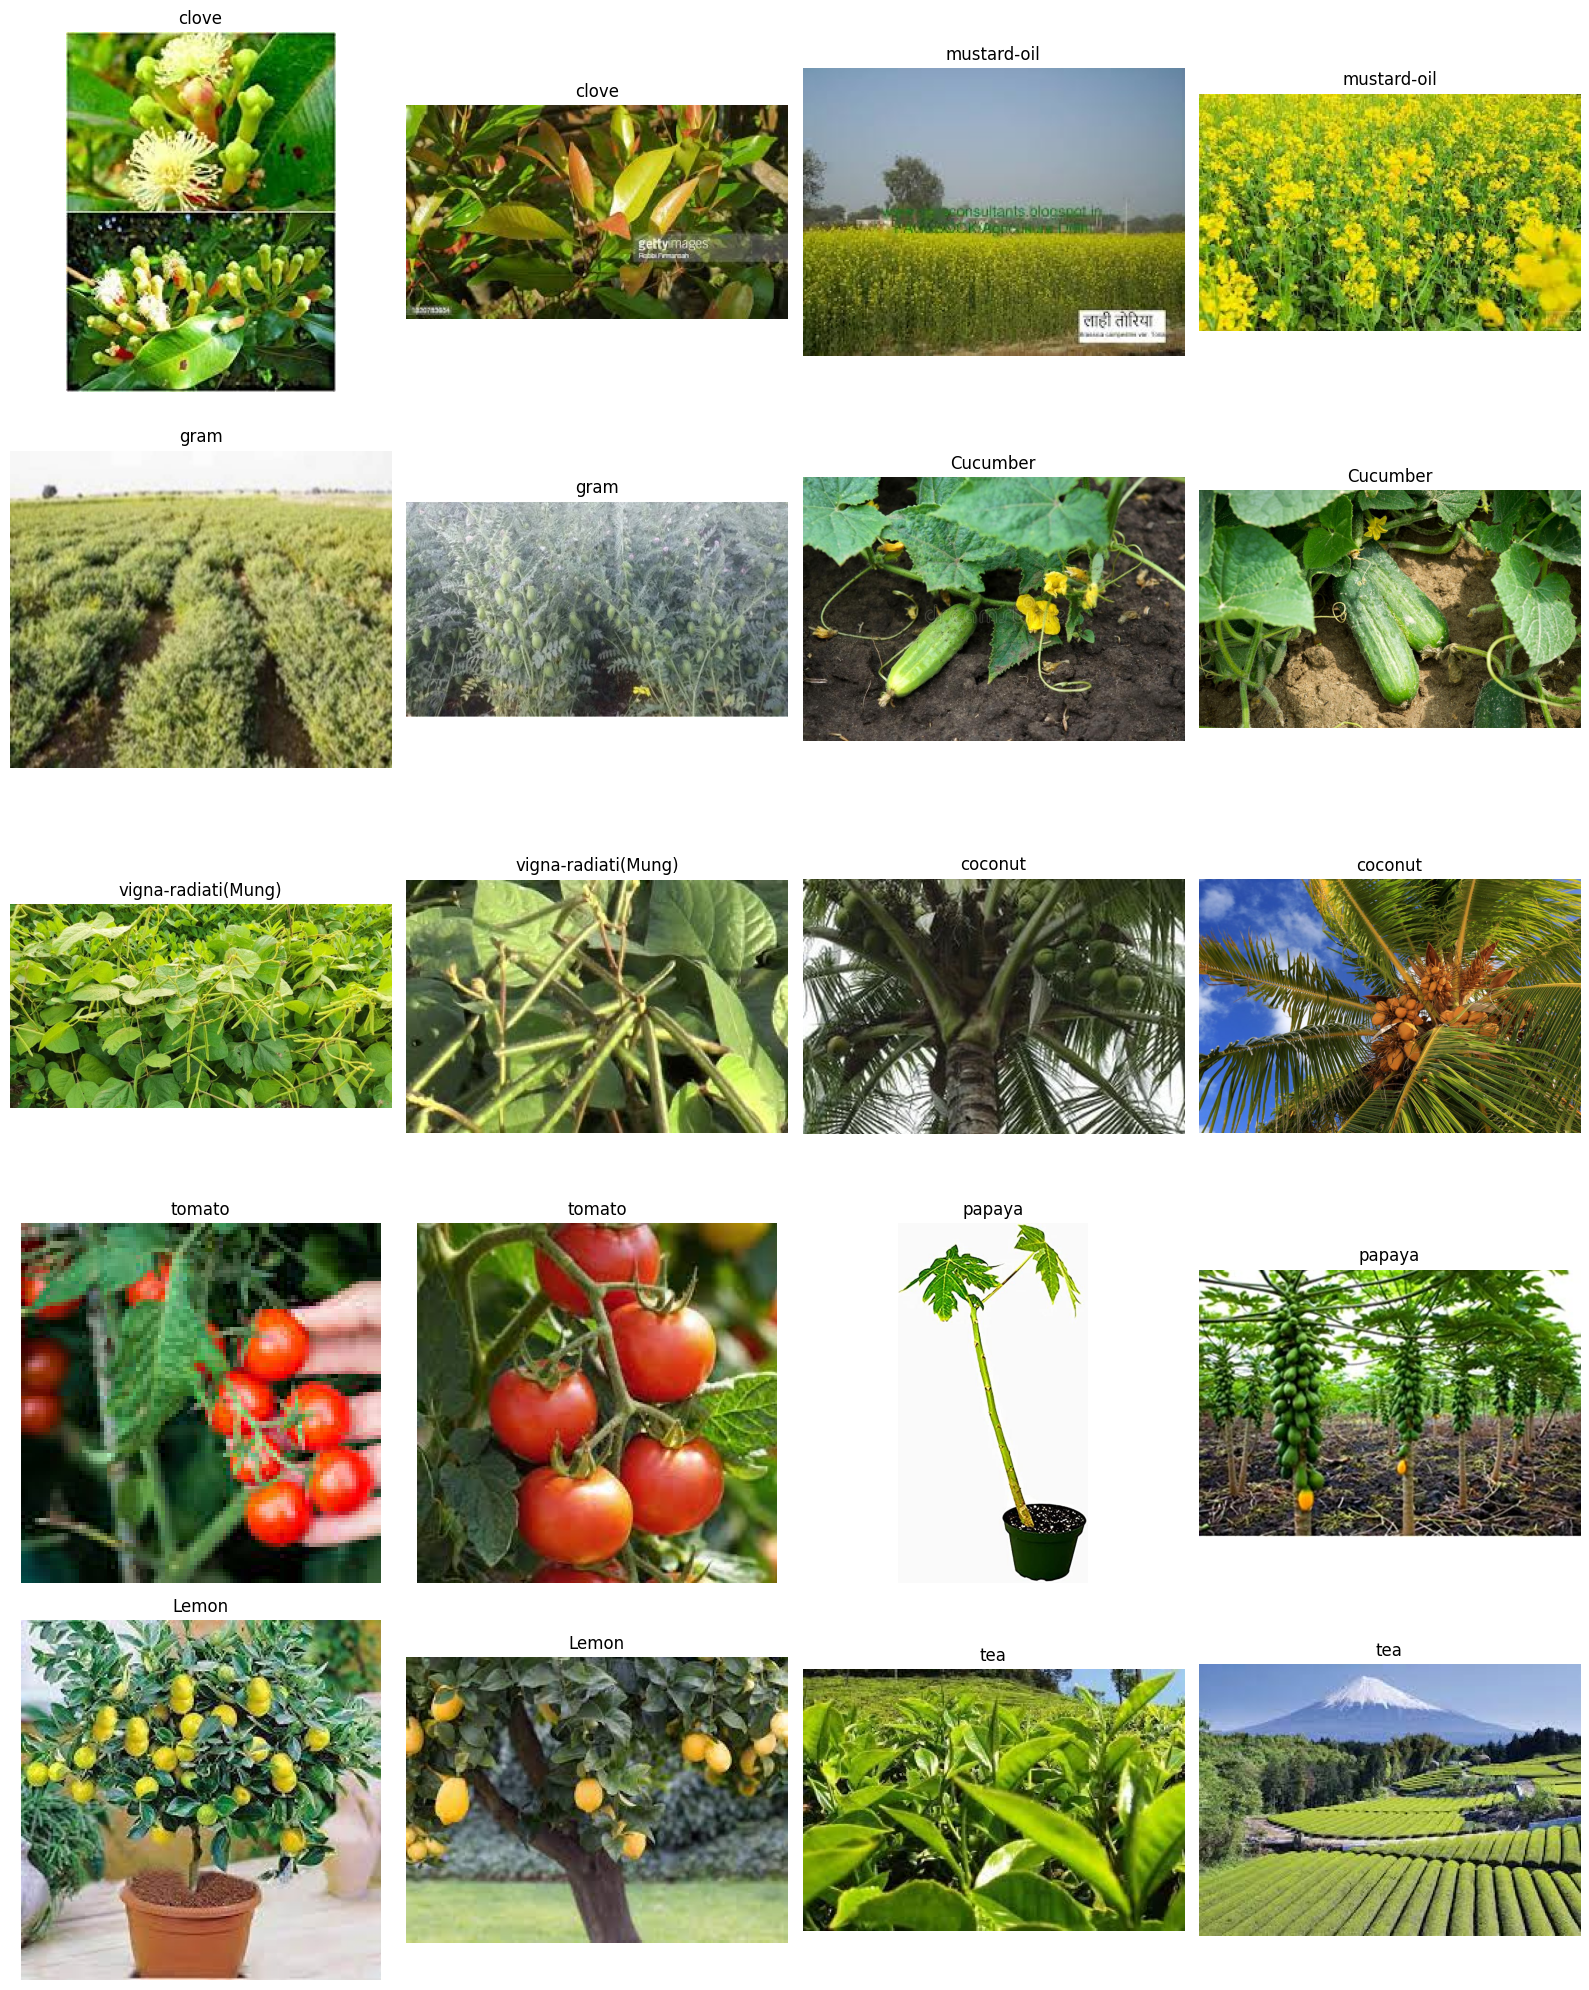

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 1. Define the base directory where the crop image folders are located
base_dir = os.path.join(download_path, 'Agricultural-crops')

# 2. Get a list of all the class names (crop types)
class_names = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# 3. Select a reasonable number of random class names (e.g., 5-10) to sample images from
num_samples_classes = min(10, len(class_names)) # Select up to 10 classes, or fewer if less are available
sampled_classes = random.sample(class_names, num_samples_classes)

print(f"Selected {num_samples_classes} classes for sampling: {sampled_classes}")

sample_images_paths = []
for class_name in sampled_classes:
    class_path = os.path.join(base_dir, class_name)
    images_in_class = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if images_in_class:
        num_images_to_sample = min(2, len(images_in_class)) # Pick 1-2 images per class
        sampled_class_images = random.sample(images_in_class, num_images_to_sample)
        for img_name in sampled_class_images:
            sample_images_paths.append((os.path.join(class_path, img_name), class_name))

# 6. Create a figure and subplots to display the selected images
num_cols = 4 # Adjust as needed
num_rows = (len(sample_images_paths) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 4, num_rows * 4))

# 7. For each chosen image:
for i, (image_path, class_name) in enumerate(sample_images_paths):
    plt.subplot(num_rows, num_cols, i + 1)
    try:
        # a. Load the image using PIL.Image.open()
        img = Image.open(image_path)
        # b. Display the image on a subplot using plt.imshow()
        plt.imshow(img)
        # c. Set the title of the subplot to the corresponding class name
        plt.title(class_name)
        # d. Turn off the axis ticks for cleaner visualization
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {image_path}: {e}")
        plt.title(f"Error loading {class_name}")
        plt.axis('off')

# 8. Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## Implement Basic Image Quality Checks

### Subtask:
Develop and apply programmatic checks to identify common image impurities or issues that could affect model training, such as corrupt files, blank images, or images with unusual properties.


### Subtask:
Develop and apply programmatic checks to identify common image impurities or issues that could affect model training, such as corrupt files, blank images, or images with unusual properties.

### Reasoning:
To identify potential impurities programmatically, I will iterate through all image files in the dataset. For each image, I will attempt to open it using `PIL` to catch `IOError` for corrupted files. If successfully opened, I will convert the image to a NumPy array to perform statistical checks for 'blank' images (e.g., low standard deviation of pixel values) and also verify its dimensions to flag unusually small images. All identified issues will be stored with their corresponding image paths for a final summary.

### Subtask:
Develop and apply programmatic checks to identify common image impurities or issues that could affect model training, such as corrupt files, blank images, or images with unusual properties.

### Reasoning:
To identify potential impurities programmatically, I will iterate through all image files in the dataset. For each image, I will attempt to open it using `PIL` to catch `IOError` for corrupted files. If successfully opened, I will convert the image to a NumPy array to perform statistical checks for 'blank' images (e.g., low standard deviation of pixel values) and also verify its dimensions to flag unusually small images. All identified issues will be stored with their corresponding image paths for a final summary.

**Reasoning**:
Now that the reasoning is outlined, I will generate the code block to implement the programmatic checks. This code will iterate through all image files, attempt to open them, and then perform checks for corruption, blankness, and unusually small dimensions, compiling a summary of any identified issues.



In [4]:
import os
from PIL import Image
import numpy as np

# 1. Initialize an empty list to store the paths of corrupted or problematic images
# and a dictionary to store issues found.
problematic_images = []

# Define thresholds for checks
BLANK_IMAGE_STD_THRESHOLD = 5.0  # Standard deviation below this might indicate a blank image
MIN_DIMENSION_THRESHOLD = 10     # Minimum width/height for an image to be considered valid

print(f"Starting image quality checks in: {base_dir}")
print(f"Blank image STD threshold: {BLANK_IMAGE_STD_THRESHOLD}")
print(f"Minimum dimension threshold: {MIN_DIMENSION_THRESHOLD}x{MIN_DIMENSION_THRESHOLD}\n")

total_images_checked = 0

# 2. Iterate through all class directories in the `base_dir`.
for class_name in class_names:
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # 3. For each class, iterate through all image files within its directory.
    for image_filename in os.listdir(class_path):
        # Filter for common image extensions
        if not image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            continue

        total_images_checked += 1
        # 4. For each image file, construct its full path.
        image_full_path = os.path.join(class_path, image_filename)

        issues_found_for_image = []

        # 5. Use a try-except block to attempt opening the image with PIL.Image.open().
        try:
            img = Image.open(image_full_path)
            img.verify() # Verify that it is an image
            img = Image.open(image_full_path) # Reopen after verify to avoid error on subsequent operations

            # 7a. Check if the image has unusually small dimensions
            width, height = img.size
            if width < MIN_DIMENSION_THRESHOLD or height < MIN_DIMENSION_THRESHOLD:
                issues_found_for_image.append(f"small_dimensions ({width}x{height})")

            # Convert image to numpy array for statistical checks
            # Ensure image is in a mode that can be converted to array (e.g., RGB or L)
            if img.mode not in ('RGB', 'L', 'RGBA'): # L is for grayscale
                img = img.convert('RGB')
            img_array = np.array(img)

            # 7b. Check if the image is blank (e.g., all pixels have the same value or are very close to black/white)
            if img_array.size == 0: # Handle empty arrays if conversion failed or image was truly empty
                issues_found_for_image.append("empty_image_array")
            else:
                # Calculate standard deviation of pixel values. For RGB images, take mean over color channels first.
                if img_array.ndim == 3: # RGB/RGBA image
                    std_dev = np.mean(np.std(img_array, axis=(0, 1)))
                else: # Grayscale image
                    std_dev = np.std(img_array)

                if std_dev < BLANK_IMAGE_STD_THRESHOLD:
                    issues_found_for_image.append(f"blank_image (std={std_dev:.2f})")

        # 6. If an IOError or other exception occurs during opening, consider the image corrupted
        except (IOError, SyntaxError, FileNotFoundError, OSError) as e:
            issues_found_for_image.append(f"corrupted_or_unreadable ({type(e).__name__}: {e})")
        except Exception as e:
            issues_found_for_image.append(f"unknown_error_opening ({type(e).__name__}: {e})")

        # 7c. If any issues are found, store the image path and the type of issue
        if issues_found_for_image:
            problematic_images.append({'path': image_full_path, 'issues': issues_found_for_image})

# 8. Print a summary of the total number of images checked and the number of problematic images found,
# along with a few examples of problematic image paths and their identified issues.

print(f"\n--- Image Quality Check Summary ---")
print(f"Total images checked: {total_images_checked}")
print(f"Total problematic images found: {len(problematic_images)}")

if problematic_images:
    print(f"\nExamples of problematic images (first 5):")
    for i, p_img in enumerate(problematic_images[:5]):
        print(f"  {i+1}. Path: {p_img['path']}\n     Issues: {', '.join(p_img['issues'])}")
else:
    print("No problematic images found based on the defined checks.")

# Optional: Store problematic_images to a variable if needed for future steps
# self.problematic_images_report = problematic_images

Starting image quality checks in: /kaggle/input/agricultural-crops-image-classification/Agricultural-crops
Blank image STD threshold: 5.0
Minimum dimension threshold: 10x10


--- Image Quality Check Summary ---
Total images checked: 829
Total problematic images found: 0
No problematic images found based on the defined checks.


## Preprocess Images for Model Training

### Subtask:
Apply necessary preprocessing steps to all images (e.g., resizing, normalization, data augmentation) to prepare the data for the training phase.


### Reasoning:
To apply the necessary preprocessing steps and prepare the data for model training, I will perform the following actions:

1.  **Import Libraries**: Import `torchvision.transforms` for image transformations, `torch.utils.data.Dataset` for custom dataset creation, and `PIL.Image` for image loading.
2.  **Define Target Image Size**: Set a standard target size (e.g., 224x224 pixels) for all images.
3.  **Define Transformations**: Create two sets of transformations using `torchvision.transforms.Compose`:
    *   **Training Transforms**: Include `transforms.Resize()`, `transforms.RandomResizedCrop()`, `transforms.RandomHorizontalFlip()`, `transforms.ToTensor()`, and `transforms.Normalize()`.
    *   **Validation/Test Transforms**: Include `transforms.Resize()`, `transforms.CenterCrop()`, `transforms.ToTensor()`, and `transforms.Normalize()`.
4.  **Create Custom Dataset Class**: Develop a `AgriculturalCropDataset` class inheriting from `torch.utils.data.Dataset`. This class will:
    *   Initialize with `base_dir`, `class_names`, and `transforms`.
    *   Map numerical labels to class names.
    *   Store a list of all image paths and their corresponding numerical labels.
    *   Implement `__len__` to return the total number of images.
    *   Implement `__getitem__` to load an image, apply the specified transformations, and return the transformed image tensor along with its numerical label.


**Reasoning**:
Based on the outlined plan, the next step is to generate the Python code to import the necessary libraries, define the target image size, create the preprocessing and data augmentation transformations, and implement the custom `AgriculturalCropDataset` class for handling image loading and transformations.



In [5]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# 2. Define the target image size
TARGET_IMAGE_SIZE = 224 # Commonly used size for many pre-trained models

# 3. Define the preprocessing and data augmentation transforms
# Mean and Std for ImageNet pre-trained models, commonly used.
# If training from scratch, these might need to be calculated from the dataset.
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.Resize((TARGET_IMAGE_SIZE, TARGET_IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((TARGET_IMAGE_SIZE, TARGET_IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# 4. Create a custom PyTorch Dataset class
class AgriculturalCropDataset(Dataset):
    def __init__(self, base_dir, class_names, transform=None):
        self.base_dir = base_dir
        self.class_names = class_names
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Create a mapping from class name to numerical label
        self.class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}

        # Populate image_paths and labels lists
        for class_name in class_names:
            class_path = os.path.join(base_dir, class_name)
            if not os.path.isdir(class_path):
                continue
            for image_filename in os.listdir(class_path):
                if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    self.image_paths.append(os.path.join(class_path, image_filename))
                    self.labels.append(self.class_to_idx[class_name])

        print(f"Initialized dataset with {len(self.image_paths)} images from {len(self.class_names)} classes.")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB') # Ensure image is RGB
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage (will be executed in the next step to demonstrate)
# # Assuming 'base_dir' and 'class_names' are already defined from previous steps
# # base_dir = os.path.join(download_path, 'Agricultural-crops') # from previous step
# # class_names = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))] # from previous step

# train_dataset = AgriculturalCropDataset(base_dir=base_dir, class_names=class_names, transform=train_transforms)
# val_dataset = AgriculturalCropDataset(base_dir=base_dir, class_names=class_names, transform=val_test_transforms)

# print(f"Training dataset size: {len(train_dataset)}")
# print(f"Validation/Test dataset size: {len(val_dataset)}")

# # To verify one item
# sample_image, sample_label = train_dataset[0]
# print(f"Sample image tensor shape: {sample_image.shape}, Sample label: {sample_label}")
# print(f"Class name for sample label: {class_names[sample_label]}")

**Reasoning**:
Now that the transformations and the custom `AgriculturalCropDataset` class have been defined, I will instantiate `train_dataset` and `val_dataset` using the `base_dir` and `class_names` variables from the kernel state. Then, I will print the sizes of these datasets and fetch a sample image and its label from the training dataset to demonstrate its functionality.



In [6]:
import os

# Assuming 'base_dir' and 'class_names' are already defined from previous steps
# base_dir = os.path.join(download_path, 'Agricultural-crops') # from previous step
# class_names = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))] # from previous step

# Instantiate the datasets
train_dataset = AgriculturalCropDataset(base_dir=base_dir, class_names=class_names, transform=train_transforms)
val_dataset = AgriculturalCropDataset(base_dir=base_dir, class_names=class_names, transform=val_test_transforms)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation/Test dataset size: {len(val_dataset)}")

# To verify one item
if len(train_dataset) > 0:
    sample_image, sample_label = train_dataset[0]
    print(f"Sample image tensor shape: {sample_image.shape}, Sample label: {sample_label}")
    print(f"Class name for sample label: {class_names[sample_label]}")
else:
    print("Training dataset is empty, cannot sample an item.")


Initialized dataset with 829 images from 30 classes.
Initialized dataset with 829 images from 30 classes.
Training dataset size: 829
Validation/Test dataset size: 829
Sample image tensor shape: torch.Size([3, 224, 224]), Sample label: 0
Class name for sample label: tomato


## Prepare Data for Model Training

### Subtask:
Split the preprocessed dataset into appropriate training, validation, and test sets.


**Reasoning**:
To prepare the data for model training, I need to split the preprocessed dataset into training, validation, and test sets, and then create DataLoader instances for efficient batch processing. I will define a custom `TransformedSubset` class to apply different transformations to the subsets after splitting.



In [7]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

# 1. Instantiate a base AgriculturalCropDataset with transform=None
# This dataset will serve as the source for splitting, without any transformations applied yet.
base_untransformed_dataset = AgriculturalCropDataset(base_dir=base_dir, class_names=class_names, transform=None)

# 2. Define the desired sizes for the training, validation, and test sets
total_size = len(base_untransformed_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size # Ensure all images are covered

print(f"Total images: {total_size}")
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

# 3. Use torch.utils.data.random_split to split the base_untransformed_dataset
train_subset, val_subset, test_subset = random_split(base_untransformed_dataset, [train_size, val_size, test_size])

# 4. Define a custom TransformedSubset class
class TransformedSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        # Get the item from the original dataset through the subset index
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.subset)

# 5. Create the final train_dataset, val_dataset, and test_dataset
# Applying train_transforms to train_subset and val_test_transforms to val_subset and test_subset
train_dataset = TransformedSubset(train_subset, transform=train_transforms)
val_dataset = TransformedSubset(val_subset, transform=val_test_transforms)
test_dataset = TransformedSubset(test_subset, transform=val_test_transforms)

print(f"\nFinal Train Dataset size: {len(train_dataset)}")
print(f"Final Validation Dataset size: {len(val_dataset)}")
print(f"Final Test Dataset size: {len(test_dataset)}")

# 6. Create DataLoader instances
batch_size = 32 # Define a suitable batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f"\nTrain DataLoader created with batch size {batch_size}.")
print(f"Validation DataLoader created with batch size {batch_size}.")
print(f"Test DataLoader created with batch size {batch_size}.")


Initialized dataset with 829 images from 30 classes.
Total images: 829
Train size: 580
Validation size: 124
Test size: 125

Final Train Dataset size: 580
Final Validation Dataset size: 124
Final Test Dataset size: 125

Train DataLoader created with batch size 32.
Validation DataLoader created with batch size 32.
Test DataLoader created with batch size 32.


## Define and Train Image Classification Model

### Subtask:
Build and train a suitable deep learning model (e.g., a Convolutional Neural Network) for agricultural crop image classification using the prepared dataset.


### Reasoning:
To define and train the model, I will first set up the environment by importing the required `torch` and `torchvision` modules. I'll then check for GPU availability to optimize training. A pre-trained `ResNet-50` model will be loaded as a base, and its final fully connected layer will be replaced to classify our specific number of crop categories. Finally, `CrossEntropyLoss` will be chosen as the loss function and `Adam` as the optimizer, suitable for image classification tasks.

**Reasoning**:
Following the outlined reasoning, I will generate the code to import necessary libraries, set up the device, load and modify the pre-trained ResNet-50 model, and define the loss function and optimizer for the image classification task.



In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# 1. Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Get the number of classes from the already defined 'class_names'
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# 2. Load a pre-trained model (ResNet-50)
model = models.resnet50(pretrained=True)

# 3. Modify the final classification layer to match the number of classes
# ResNet-50's final layer is 'fc'
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Move the model to the defined device
model = model.to(device)

# 4. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model loaded and modified.")
print("Loss function (CrossEntropyLoss) and Optimizer (Adam) defined.")

Using device: cpu
Number of classes: 30


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 59.3MB/s]


Model loaded and modified.
Loss function (CrossEntropyLoss) and Optimizer (Adam) defined.


**Reasoning**:
Now that the model, loss function, and optimizer are defined, I will implement the training and validation loop. This involves iterating through a specified number of epochs, performing forward and backward passes, updating weights, and calculating training and validation loss and accuracy to monitor performance.



In [ ]:
num_epochs = 10 # You can adjust this number

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, device):
    model.train() # Set model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training Phase
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_accuracy = 100 * correct_train / total_train

        # Validation Phase
        model.eval() # Set model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad(): # No need to compute gradients during validation
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_accuracy = 100 * correct_val / total_val

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.2f}% | "
              f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%")

        model.train() # Set model back to training mode for the next epoch

    print("Finished Training")
    return model

# Start training the model
model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, device)